# Composite Models: two-zone jets

In [1]:
from jetset.jet_model import Jet
from jetset.plot_sedfit import PlotSED
from jetset.model_manager import FitModel

We setup a two-zone model for an EC scenario, using a conical jet.

## Setting the two components

In [2]:
from jetset.jet_model import Jet

In [3]:
compact_jet=Jet(name='compact_jet',beaming_expr='bulk_theta')

===> setting C threads to 12


In [4]:
compact_jet.add_EC_component(['EC_DT','EC_BLR'],disk_type='BB')

In [5]:
#we make the jet conical
compact_jet.make_conical_jet()

adding par: R_H to  R
adding par: theta_open to  R
==> par R is depending on ['R_H', 'theta_open'] according to expr:   R =
np.tan(np.radians(theta_open))*R_H
setting R_H to 5.715026151380672e+16


In [6]:
#we set the proper dependencies for the EC fields
compact_jet.set_EC_dependencies()

adding par: L_Disk to  R_BLR_in
==> par R_BLR_in is depending on ['L_Disk'] according to expr:   R_BLR_in =
3E17*(L_Disk/1E46)**0.5
adding par: R_BLR_in to  R_BLR_out
==> par R_BLR_out is depending on ['R_BLR_in'] according to expr:   R_BLR_out =
R_BLR_in*1.1
adding par: L_Disk to  R_DT
==> par R_DT is depending on ['L_Disk'] according to expr:   R_DT =
2E19*(L_Disk/1E46)**0.5


In [7]:
compact_jet.show_model()


--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: compact_jet  
geometry: spherical  

electrons distribution:
 type: plc  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

accretion disk:
 disk Type: BB
 L disk: 1.000000e+45 (erg/s)
 T disk: 1.000000e+05 (K)
 nu peak disk: 8.171810e+15 (Hz)
radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
   name:EC_DT, state: on
   name:EC_DT, hidden: False
   name:DT, state: on
   name:DT, hidden: False
   name:Disk

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
compact_jet,"*R(D,theta_open)",region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,True
compact_jet,R_H(M),region_position,cm,5.715026e+16,0.000000e+00,--,False,False
compact_jet,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
compact_jet,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
compact_jet,theta,jet-viewing-angle,deg,1.000000e-01,0.000000e+00,9.000000e+01,False,False
compact_jet,BulkFactor,jet-bulk-factor,lorentz-factor*,1.000000e+01,1.000000e+00,1.000000e+05,False,False
compact_jet,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
compact_jet,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
compact_jet,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
compact_jet,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False


--------------------------------------------------------------------------------


Now we clone the ``compact`` jet to generate the ``extended`` region

In [8]:
extended_jet=compact_jet.clone()

===> setting C threads to 12
adding par: L_Disk to  R_DT
==> par R_DT is depending on ['L_Disk'] according to expr:   R_DT =
2E19*(L_Disk/1E46)**0.5
adding par: L_Disk to  R_BLR_in
==> par R_BLR_in is depending on ['L_Disk'] according to expr:   R_BLR_in =
3E17*(L_Disk/1E46)**0.5
adding par: R_BLR_in to  R_BLR_out
==> par R_BLR_out is depending on ['R_BLR_in'] according to expr:   R_BLR_out =
R_BLR_in*1.1
adding par: R_H to  R
adding par: theta_open to  R
==> par R is depending on ['R_H', 'theta_open'] according to expr:   R =
np.tan(np.radians(theta_open))*R_H


## Setting the composite model

In [9]:
extended_jet.name='extended_jet'

In [10]:
from jetset.model_manager import FitModel

In [11]:
composite_jet=FitModel(nu_size=500, name='composite_jet')

/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/model_manager.py:158: UserWarning: no cosmology defined, using FlatLambdaCDM(name="Planck13", H0=67.77 km / (Mpc s), Om0=0.30712, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.048252)
  warnings.warn(m)


In [12]:
composite_jet.add_component(compact_jet)

In [13]:
composite_jet.add_component(extended_jet)

We set the functional expression for the model composition

In [14]:
composite_jet.composite_expr='extended_jet+compact_jet'

In [15]:
composite_jet.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
compact_jet,"*R(D,theta_open)",region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,True
compact_jet,R_H(M),region_position,cm,5.715026e+16,0.000000e+00,--,False,False
compact_jet,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
compact_jet,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
compact_jet,theta,jet-viewing-angle,deg,1.000000e-01,0.000000e+00,9.000000e+01,False,False
compact_jet,BulkFactor,jet-bulk-factor,lorentz-factor*,1.000000e+01,1.000000e+00,1.000000e+05,False,False
compact_jet,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
compact_jet,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
compact_jet,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
compact_jet,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False


### Linking pars in the composite model

In [16]:
linked_pars=['z_cosm','theta_open','theta','T_Disk','L_Disk','T_DT']
for par in linked_pars:
    composite_jet.link_par(par_name=par,from_model='extended_jet',to_model='compact_jet')


adding par: z_cosm to  z_cosm
adding par: theta_open to  theta_open
adding par: theta to  theta
adding par: T_Disk to  T_Disk
adding par: L_Disk to  L_Disk
adding par: T_DT to  T_DT


In [17]:
#we hide the duplicated components from DT and Disk
composite_jet.extended_jet.spectral_components.DT.hidden=True
composite_jet.extended_jet.spectral_components.Disk.hidden=True

In [18]:
composite_jet.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
compact_jet,"*R(D,theta_open)",region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,True
compact_jet,R_H(M),region_position,cm,5.715026e+16,0.000000e+00,--,False,False
compact_jet,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
compact_jet,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
compact_jet,theta(M),jet-viewing-angle,deg,1.000000e-01,0.000000e+00,9.000000e+01,False,False
compact_jet,BulkFactor,jet-bulk-factor,lorentz-factor*,1.000000e+01,1.000000e+00,1.000000e+05,False,False
compact_jet,z_cosm(M),redshift,,1.000000e-01,0.000000e+00,--,False,False
compact_jet,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
compact_jet,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
compact_jet,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False


### setting pars in the extended and compat components

In [19]:
composite_jet.compact_jet.parameters.R_H.val=1E18

In [20]:
composite_jet.extended_jet.parameters.R_H.val=5E19

In [21]:
composite_jet.extended_jet.parameters.gamma_cut.val=1E3

In [22]:
composite_jet.extended_jet.parameters.B.val=0.001
composite_jet.extended_jet.parameters.N.val=1

In [23]:
composite_jet.eval()

In [24]:
composite_jet.extended_jet.spectral_components.DT.hidden=True
composite_jet.extended_jet.spectral_components.Disk.hidden=True

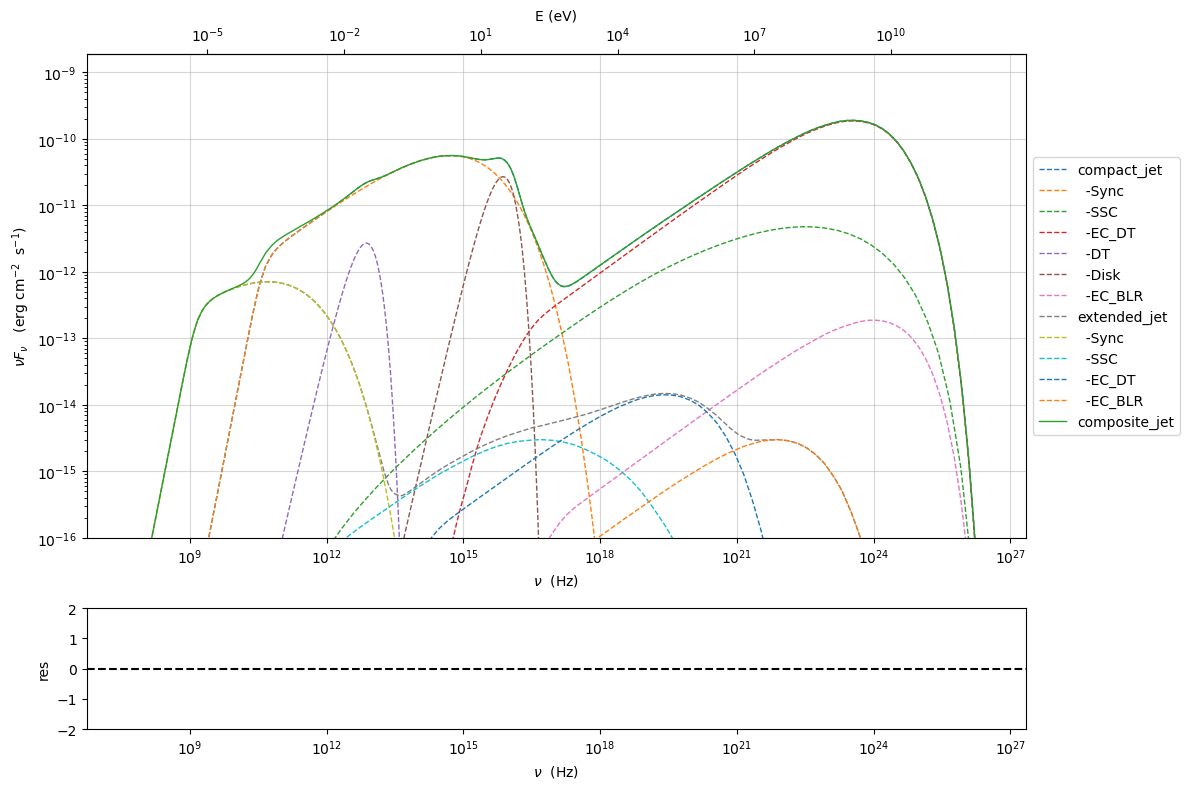

In [25]:
composite_jet.eval()
p=composite_jet.plot_model(skip_components=False)
p.setlim(y_min=1E-16)